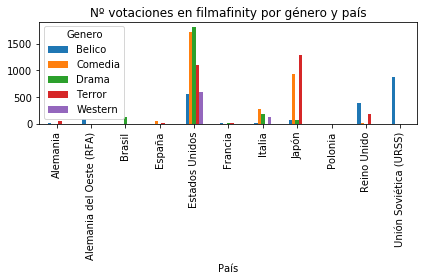

In [14]:
# Importando librerías necesarias...
from requests import get
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import csv
import tkinter as tk
from tkinter import filedialog
import matplotlib
import matplotlib.pyplot as plt

# Creamos un dataFrame únicamente con las cabeceras
df_fa = pd.DataFrame(columns = ('Genero', 'Nombre Pelicula', 'Año estreno', 
                          'País', 'Valoración FA', 'Director', 'Cantidad Votaciones', 'Reparto'))

# Creamos un array de url's, en las cualesse encuentran las distintas películas
url = 'https://www.filmaffinity.com/es/topgen.php?genre=BE&fromyear=&toyear=&country=&nodoc'
url1 = 'https://www.filmaffinity.com/es/topgen.php?genre=CO&fromyear=&toyear=&country=&nodoc'
url2 = 'https://www.filmaffinity.com/es/topgen.php?genre=TE&fromyear=&toyear=&country=&nodoc'
url3 = 'https://www.filmaffinity.com/es/topgen.php?genre=DR&fromyear=&toyear=&country=&nodoc'
url4 = 'https://www.filmaffinity.com/es/topgen.php?genre=WE&fromyear=&toyear=&country=&nodoc'
urls = np.array([url, url1, url2, url3, url4])

# Creamos un array de los nombres de los géneros
generos = np.array(['Belico', 'Comedia', 'Terror', 'Drama', 'Western'])

# En este bucle se recorren las 5 posiciones del array de url´s y del array de géneros
for j in range(0,5):
    
    # Llamada a la estructura html de la url en cuestión
    response = get(urls[j])
    html_soup = BeautifulSoup(response.text, 'html.parser')
    
    # Creación de contenedores necesarios
    movie_containers = html_soup.find_all("div", {"class": "mc-info-container"})
    movie_containers_scores = html_soup.find_all("div", {"class": "avg-rating"})
    movie_containers_scores_amount = html_soup.find_all("div", {"class": "rat-count"})
    
    # Creación de arrays vacíos para ir rellenando los distintos campos del dataframe
    genero = []
    name = []
    year = []
    country = []
    fa_rating = []
    director = []
    votaciones = []
    casting = []

# En este bucle se recorren las 30 películas que contiene cada una de las url´s
    for i in range(0,30):
        
        # Rellenando género...
        genero.append(generos[j])
        
        # Rellenando name...
        movie = movie_containers[i]
        nombre = movie.a.text
        name.append(nombre)
        
        # Rellenando year...
        año = movie.find('div', class_ = 'mc-title')
        año2 = año.text[-8:-4]
        year.append(año2)

        # Rellenando country...
        pais = año.img['alt']
        country.append(pais)
    
        # Rellenando fa_rating...
        score = movie_containers_scores[i]
        score = score.text    
        fa_rating.append(score)
    
        # Rellenando director...
        director1 = movie.find_all("div", {"class": "mc-director"})
        director2 = director1[0].text
        director.append(director2)
        
        # Rellenando votaciones...
        votos = movie_containers_scores_amount[i]
        votos1 = votos.text 
        votaciones.append(votos1)
    
        # Rellenando casting...
        cast = html_soup.find_all("div", {"class": "mc-cast"})
        cast = cast[0].text
        casting.append(cast)
    
    # Inclusión de los arrays creados a un dataframe dinámico
    df_fa2 = pd.DataFrame({
    'Genero': genero,
    'Nombre Pelicula': name,
    'Año estreno': year,
    'País': country,
    'Valoración FA': fa_rating,
    'Director' : director,
    'Cantidad Votaciones': votaciones,     
    'Reparto': casting})

    # Añadimos el dataframe creado a nuestro dataframe base
    df_fa = pd.concat([df_fa, df_fa2], ignore_index = True)


# Algunas visualizaciones gráficas que permitan hacerse una idea de la potencialidad del dataFrame
df_fa['Cantidad Votaciones'] = df_fa['Cantidad Votaciones'].astype(float)
Cantidad_Votaciones = df_fa.groupby(['País', 'Genero']).sum()["Cantidad Votaciones"].unstack()
Cantidad_Votaciones.plot(kind="bar")
plt.title('Nº votaciones en filmafinity por género y país')
plt.tight_layout()
    

# Creación de una ventana emergente
root= tk.Tk()
canvas1 = tk.Canvas(root, width = 300, height = 300, bg = 'lightsteelblue2', relief = 'raised')
canvas1.pack()

# La función que ejecuta la ventana emergente y que crea el csv a partir de nuestro dataframe
def exportCSV ():
    global df_fa
    export_file_path = filedialog.asksaveasfilename(defaultextension='.csv')
    df_fa.to_csv (export_file_path, index = False, header=True)

# Creación de un botón que permita la descarga del csv
saveAsButton_CSV = tk.Button(text='Descarga CSV', command=exportCSV, bg='green', fg='white', font=('helvetica', 12, 'bold'))

# Ejecución de la ventana emergente con el botón
canvas1.create_window(150, 150, window=saveAsButton_CSV)
root.mainloop()    